<a href="https://colab.research.google.com/github/omniaahmed55/ML/blob/main/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
imdevskp_corona_virus_report_path = kagglehub.dataset_download('imdevskp/corona-virus-report')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/country_wise_latest.csv
/kaggle/input/corona-virus-report/day_wise.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/worldometer_data.csv
/kaggle/input/corona-virus-report/full_grouped.csv


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the datasets
usa_county_wise = pd.read_csv('/kaggle/input/corona-virus-report/usa_county_wise.csv')
worldometer_data = pd.read_csv('/kaggle/input/corona-virus-report/worldometer_data.csv')
country_wise_latest = pd.read_csv('/kaggle/input/corona-virus-report/country_wise_latest.csv')
covid_19_clean_complete = pd.read_csv('/kaggle/input/corona-virus-report/covid_19_clean_complete.csv')
day_wise = pd.read_csv('/kaggle/input/corona-virus-report/day_wise.csv')
full_grouped = pd.read_csv('/kaggle/input/corona-virus-report/full_grouped.csv')

# Display the basic information for each dataset
datasets_info = {
    "USA County Wise": usa_county_wise.info(),
    "Worldometer Data": worldometer_data.info(),
    "Country Wise Latest": country_wise_latest.info(),
    "COVID-19 Clean Complete": covid_19_clean_complete.info(),
    "Day Wise": day_wise.info(),
    "Full Grouped": full_grouped.info(),
}

datasets_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627920 entries, 0 to 627919
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             627920 non-null  int64  
 1   iso2            627920 non-null  object 
 2   iso3            627920 non-null  object 
 3   code3           627920 non-null  int64  
 4   FIPS            626040 non-null  float64
 5   Admin2          626792 non-null  object 
 6   Province_State  627920 non-null  object 
 7   Country_Region  627920 non-null  object 
 8   Lat             627920 non-null  float64
 9   Long_           627920 non-null  float64
 10  Combined_Key    627920 non-null  object 
 11  Date            627920 non-null  object 
 12  Confirmed       627920 non-null  int64  
 13  Deaths          627920 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 67.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (tota

{'USA County Wise': None,
 'Worldometer Data': None,
 'Country Wise Latest': None,
 'COVID-19 Clean Complete': None,
 'Day Wise': None,
 'Full Grouped': None}

In [ ]:
usa_county_wise.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
627915,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",7/27/20,347,1
627916,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",7/27/20,70,0
627917,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",7/27/20,2781,23
627918,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",7/27/20,142,0
627919,84070020,US,USA,840,NaN,Weber-Morgan,Utah,US,41.271160,-111.914512,"Weber-Morgan, Utah, US",7/27/20,2375,24


In [ ]:
full_grouped.tail()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa
35155,2020-07-27,Zimbabwe,2704,36,542,2126,192,2,24,Africa


In [ ]:
usa_county_wise['Date'] = pd.to_datetime(usa_county_wise['Date'])
covid_19_clean_complete['Date'] = pd.to_datetime(covid_19_clean_complete['Date'])
day_wise['Date'] = pd.to_datetime(day_wise['Date'])
full_grouped['Date'] = pd.to_datetime(full_grouped['Date'])


<ipython-input-8-3435120a5c83>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  usa_county_wise['Date'] = pd.to_datetime(usa_county_wise['Date'])


In [ ]:
# Summarize global trends from the "Day Wise" dataset
global_trends = day_wise.set_index('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']]
day_wise

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


In [ ]:
global_trends_summary = global_trends.describe()
global_trends_summary

,Confirmed,Deaths,Recovered,Active
count,1.880000e+02,188.000000,1.880000e+02,1.880000e+02
mean,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06
std,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06
min,5.550000e+02,17.000000,2.800000e+01,5.100000e+02
25%,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04
50%,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06
75%,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06
max,1.648048e+07,654036.000000,9.468087e+06,6.358362e+06


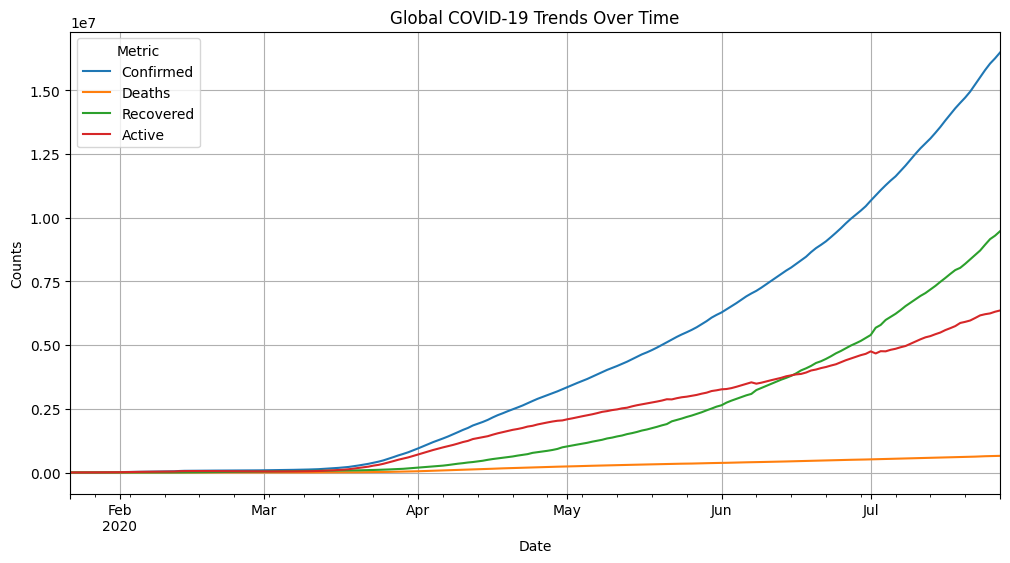

,Confirmed,Deaths,Recovered,Active
count,1.880000e+02,188.000000,1.880000e+02,1.880000e+02
mean,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06
std,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06
min,5.550000e+02,17.000000,2.800000e+01,5.100000e+02
25%,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04
50%,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06
75%,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06
max,1.648048e+07,654036.000000,9.468087e+06,6.358362e+06


In [ ]:

# Plot cumulative global trends
global_trends.plot(figsize=(12, 6))
plt.title('Global COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.legend(title='Metric')
plt.grid()
plt.show()

# Display summary statistics of the global trends
global_trends_summary

In [ ]:
country_wise_latest

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


,Confirmed,Deaths,Recovered,Active
WHO Region,,,,
Americas,8839286,342732,4468616,4027938
Europe,3299523,211144,1993723,1094656
South-East Asia,1835297,41349,1156933,637015
Eastern Mediterranean,1490744,38339,1201400,251005
Africa,723207,12223,440645,270339
Western Pacific,292428,8249,206770,77409


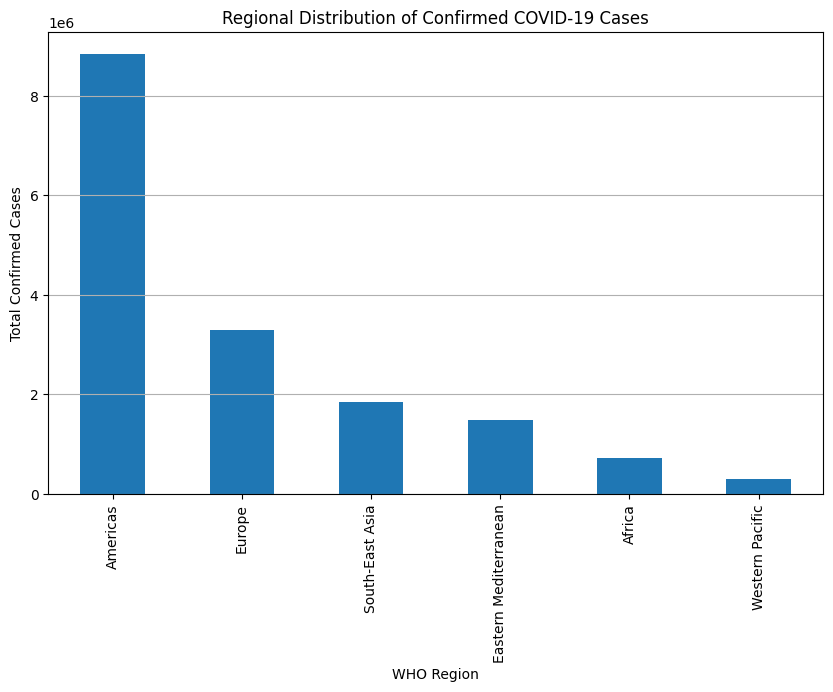

In [ ]:
# Summarize by region using the "Country Wise Latest" dataset
regional_summary = country_wise_latest.groupby('WHO Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'Active': 'sum'
}).sort_values(by='Confirmed', ascending=False)

# Display the regional summary
display(regional_summary)

# Plot regional distribution of confirmed cases
regional_summary['Confirmed'].plot(kind='bar', figsize=(10, 6))
plt.title('Regional Distribution of Confirmed COVID-19 Cases')
plt.xlabel('WHO Region')
plt.ylabel('Total Confirmed Cases')
plt.grid(axis='y')
plt.show()

In [ ]:
country_recovery_rates = country_wise_latest.copy()
country_recovery_rates['Recovery Rate (%)'] = (
    country_recovery_rates['Recovered'] / country_recovery_rates['Confirmed'] * 100
).round(2)
country_recovery_rates_sorted = country_recovery_rates[['Country/Region', 'Confirmed', 'Recovered', 'Recovery Rate (%)']].sort_values(
    by='Recovery Rate (%)', ascending=False
)
top_recovery_countries = country_recovery_rates_sorted.head(10)
display(top_recovery_countries)

,Country/Region,Confirmed,Recovered,Recovery Rate (%)
75,Holy See,12,12,100.00
69,Grenada,23,23,100.00
49,Dominica,18,18,100.00
48,Djibouti,5059,4977,98.38
78,Iceland,1854,1823,98.33
24,Brunei,141,138,97.87
121,New Zealand,1557,1514,97.24
136,Qatar,109597,106328,97.02
105,Malaysia,8904,8601,96.60
110,Mauritius,344,332,96.51


<Axes: xlabel='Country/Region'>

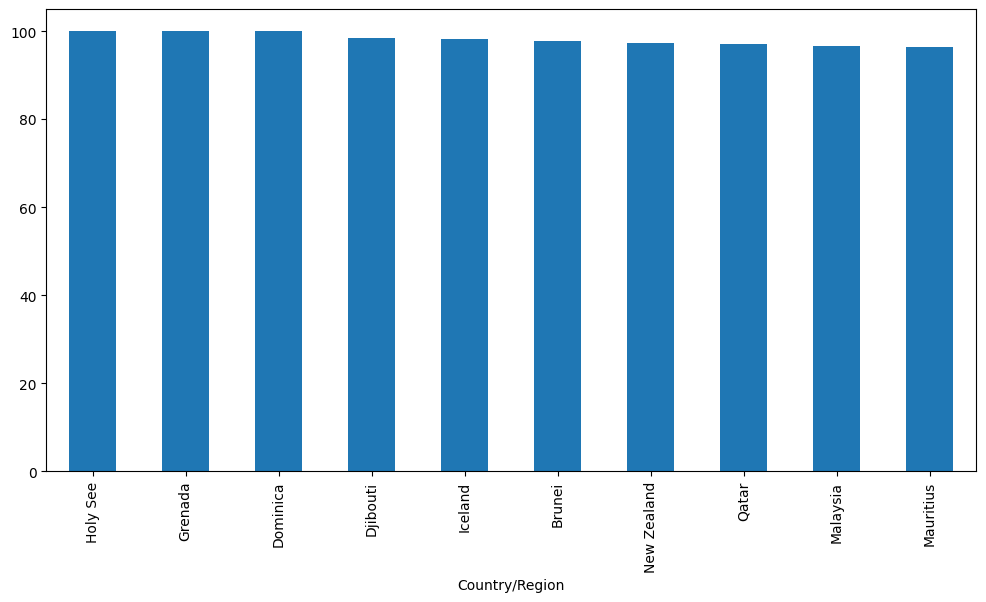

In [ ]:
top_recovery_countries.plot(
    x='Country/Region', y='Recovery Rate (%)', kind='bar', figsize=(12, 6), legend=False
)